> Martin Fridrich 03/2022

# Initial exploratory data analysis - Retail Rocket dataset

### Goals

We strive to examine the dataset in such a way, so we can design and implement a meaningful processing pipeline and use the results in downstream models. To meet the goal, we analyze the size + packaging (num of records, cols, dtypes, memory requirements, coverage amongst the tables) and explore a few business aspects (basic stats, outliers, trends, customer & supplier & item, demand curve).

Unfortunately, we find that the data at hand are not suitable for customer churn modeling. Only 138 customers with 5 or more transactions. See the print-outs.

## Data loading

In [48]:
DATA_DIR = "../data/raw/rr/"

import pandas as pd
import matplotlib.pyplot as plt

In [5]:
events = pd.read_csv(DATA_DIR+"events.csv")
print("\nPeek at basic properties.")
display(events.head(3)); display(events.info());


Peek at basic properties.


,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


None

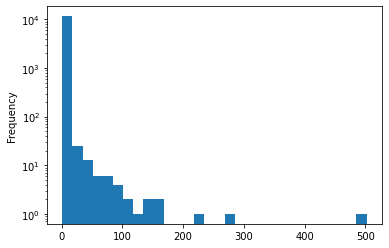

visitorid
17676       39
53842       56
55389        7
57905       34
76757      155
          ... 
1374597      5
1376763      6
1385029      5
1385073     61
1403769      7
Name: transactionid, Length: 138, dtype: int64

In [49]:
# ANOTHER BIG FUCK
events[events.event=="transaction"].groupby("visitorid").transactionid.nunique().\
    sort_values(ascending=False).plot(kind="hist", logy=True, bins=30);
plt.show();
visitor_transaction_counts = events[events.event=="transaction"].\
    groupby("visitorid").transactionid.nunique()
visitor_transaction_counts[visitor_transaction_counts>4]